In [42]:
import numpy as np
import pandas as pd
import random
from itertools import accumulate, repeat
import altair as alt

In [4]:
np.random.rand(1)

array([0.93001225])

In [5]:
np.random.uniform(-3,3,1)

array([0.43773914])

In [15]:
def genTempDataPoint(x, *args):
    if np.random.rand(1) <= 0.9:
        return x + np.random.uniform(-3,3,1)[0]
    else:
        return x + np.random.uniform(-10,10,1)[0]

In [12]:
list(accumulate(repeat(70, 26), genTempDataPoint))

[70,
 70.58426942458928,
 71.96758387305506,
 74.74930782623953,
 77.37799272889669,
 79.39693161606806,
 79.82072810316411,
 81.12013193610383,
 82.65275935716528,
 80.93009686558756,
 80.05082190466625,
 79.01551038116185,
 78.5718969700213,
 78.30513741176485,
 81.15098842004502,
 87.68238426192138,
 89.20664282466163,
 88.57788795360663,
 88.8459567634971,
 88.2641163633943,
 86.60013200004991,
 88.31254399298109,
 85.63799633683487,
 82.93530346545876,
 85.54399796884007,
 87.58170850613367]

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

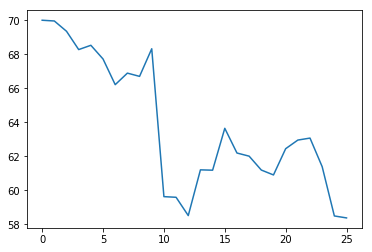

In [14]:
plt.plot(range(26), list(accumulate(repeat(70, 26), genTempData)))

In [16]:
list(accumulate(repeat(70, 5), genTempDataPoint))

[70,
 69.00258239202094,
 59.34919781643355,
 56.60722073795931,
 57.265078261782946]

In [53]:
def genTempData(base, n):
    return list(accumulate(repeat(base, n), 
                           genTempDataPoint))

In [18]:
getgenTempData(70, 15)

[70,
 70.43588413005497,
 68.31471222334697,
 70.15642124793783,
 70.39604815886037,
 70.36383009157365,
 67.77515180722749,
 69.8451434731288,
 70.62679761819457,
 70.61863003133179,
 68.85640323926097,
 70.11277060246753,
 71.72484207155475,
 70.35272910356632,
 70.48715337028115]

In [19]:
[("sdfdf", x) for x in genTempData(70, 15)]

[('sdfdf', 70),
 ('sdfdf', 69.26122226287507),
 ('sdfdf', 60.243570764909),
 ('sdfdf', 61.383655702761786),
 ('sdfdf', 63.44634266909335),
 ('sdfdf', 61.502179507727305),
 ('sdfdf', 61.72735029074467),
 ('sdfdf', 62.94190382313891),
 ('sdfdf', 59.96456896718345),
 ('sdfdf', 61.81897855316815),
 ('sdfdf', 60.97198050268841),
 ('sdfdf', 59.35681486731737),
 ('sdfdf', 61.73375509670958),
 ('sdfdf', 63.41890620654821),
 ('sdfdf', 57.61528333635448)]

In [20]:
[(x[0], "sdfdf", x[1]) 
 for x in enumerate(genTempData(70, 15))]

[(0, 'sdfdf', 70),
 (1, 'sdfdf', 68.73752311164068),
 (2, 'sdfdf', 72.67401879554129),
 (3, 'sdfdf', 73.77494140923355),
 (4, 'sdfdf', 73.630545350083),
 (5, 'sdfdf', 73.4599011962267),
 (6, 'sdfdf', 71.84813752515565),
 (7, 'sdfdf', 72.74337364862681),
 (8, 'sdfdf', 73.11573315037785),
 (9, 'sdfdf', 75.10820055305993),
 (10, 'sdfdf', 75.23988911479958),
 (11, 'sdfdf', 68.72874758963668),
 (12, 'sdfdf', 66.00660123262159),
 (13, 'sdfdf', 66.65976272313989),
 (14, 'sdfdf', 64.39466300333432)]

In [34]:
def makeLocation(name, base, n):
    return [(x[0], name, x[1]) 
                   for x in enumerate(genTempData(base, n))]

In [22]:
from itertools import chain

In [25]:
bigList = list(chain.from_iterable([makeLocation("1", 70, 15),
                          makeLocation("2", 70, 15)]))
np.random.shuffle(bigList)
bigList

[(9, '1', 72.44322416529208),
 (11, '1', 71.87439229283346),
 (0, '1', 70),
 (1, '1', 69.60840979520617),
 (1, '2', 69.94433407968341),
 (13, '1', 69.25644068307444),
 (7, '1', 72.67301887105407),
 (14, '1', 70.36199170953557),
 (5, '2', 67.70651921966447),
 (2, '1', 70.60222542423347),
 (10, '1', 70.96779376397629),
 (3, '2', 65.98729541700064),
 (5, '1', 72.76720451417825),
 (12, '2', 68.72896777004979),
 (13, '2', 67.74646499578314),
 (7, '2', 72.16977944851433),
 (12, '1', 70.26873924394678),
 (8, '1', 70.34963262800144),
 (0, '2', 70),
 (10, '2', 68.58333920204994),
 (3, '1', 72.60802367049503),
 (11, '2', 67.89059123628923),
 (6, '1', 71.00683777587466),
 (4, '2', 68.70495687423593),
 (6, '2', 69.25978881566043),
 (2, '2', 68.87374711396217),
 (9, '2', 71.41273286728126),
 (8, '2', 69.65313249753683),
 (14, '2', 68.14574575427346),
 (4, '1', 69.82680888516299)]

In [32]:
bigList = list(chain.from_iterable(makeLocation(str(x), 70, 15) 
                         for x in range(10)))
np.random.shuffle(bigList)

In [36]:
df = pd.DataFrame(bigList, columns = ["Time", "Loc", "Temp"])

In [37]:
df.iloc[:5]

,Time,Loc,Temp
0,7,6,71.786092
1,6,2,66.983147
2,14,7,66.177721
3,8,0,71.247717
4,5,4,64.610055


In [38]:
melted = pd.melt(df, id_vars=["Time", "Loc"])

In [40]:
melted

,Time,Loc,variable,value
0,7,6,Temp,71.786092
1,6,2,Temp,66.983147
2,14,7,Temp,66.177721
3,8,0,Temp,71.247717
4,5,4,Temp,64.610055
5,13,3,Temp,71.129905
6,5,9,Temp,63.813828
7,4,2,Temp,71.869899
8,3,3,Temp,70.163073
9,7,8,Temp,68.891544


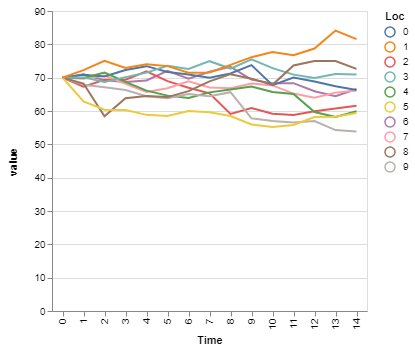

In [50]:
(alt.Chart(melted)
 .mark_line()
 .encode(x='Time:O',
         y='value:Q',
         color='Loc:N')
#.transform_timeunit(
#    time='hours(Time)')
).interactive()

In [51]:
list(zip(genTempData(70, 15), genTempData(40, 15)))

[(70, 40),
 (68.14639407984521, 43.416400768850316),
 (71.09389197534009, 42.37965505014785),
 (73.92330669525398, 39.48323204094391),
 (73.15558310704363, 37.76551128440194),
 (74.75869609209232, 35.365574336201156),
 (69.00721343417054, 37.810968343514105),
 (68.30991585238975, 39.834111248149554),
 (65.87310723978118, 41.704579829324366),
 (63.641711269665166, 40.585507665117674),
 (61.235313356181074, 41.868352227808124),
 (57.528617638898645, 42.301654464985226),
 (62.06015203129028, 40.428685951115895),
 (59.89472477873843, 38.93176083281464),
 (59.90519148528063, 37.57138411860903)]

In [52]:
[(x[0], "sdfdf", x[1][0], x[1][1]) 
 for x in enumerate(zip(genTempData(70, 15),
                        genTempData(40, 15)) )]

[(0, 'sdfdf', 70, 40),
 (1, 'sdfdf', 69.5708674301048, 41.84965737863425),
 (2, 'sdfdf', 74.25780751706652, 40.413774555959),
 (3, 'sdfdf', 73.51651160742671, 41.91291438512239),
 (4, 'sdfdf', 71.8496885880202, 42.71548229266241),
 (5, 'sdfdf', 69.95190092002707, 43.139760828059934),
 (6, 'sdfdf', 71.97860530001668, 42.573512575823585),
 (7, 'sdfdf', 71.63026263615367, 52.42823375152406),
 (8, 'sdfdf', 71.68426470518489, 52.18058368413688),
 (9, 'sdfdf', 70.88937713144061, 51.76887303414),
 (10, 'sdfdf', 69.42088988562107, 50.70306139108253),
 (11, 'sdfdf', 75.08930526932473, 52.898287945669374),
 (12, 'sdfdf', 76.45979409090037, 54.162829733646774),
 (13, 'sdfdf', 73.78227188041119, 56.782199685998535),
 (14, 'sdfdf', 70.98151334929806, 58.560425624421256)]

In [54]:
def makeLocation(name, base1, n1, base2, n2):
    return [(x[0], name, x[1][0], x[1][1]) 
                   for x in enumerate(zip(genTempData(base1, n1),
                        genTempData(base2, n2)) )]

In [55]:
bigList = list(chain.from_iterable(makeLocation(str(x), 
                                                70, 
                                                15,
                                                40, 
                                                15) 
                         for x in range(10)))
np.random.shuffle(bigList)

df = pd.DataFrame(bigList, 
                  columns = ["Time", "Loc", "Temp", "Hum"])

In [56]:
df.iloc[:5]


,Time,Loc,Temp,Hum
0,9,8,72.083277,33.472383
1,11,8,71.674503,35.165968
2,2,3,67.100551,45.144483
3,2,0,69.947489,43.050595
4,14,0,61.075034,57.498850


In [ ]:
(alt.Chart(melted)
 .mark_line()
 .encode(x='Time:O',
         y='value:Q',
         color='Loc:N')

In [57]:
melted = pd.melt(df, id_vars=["Time", "Loc"])

In [58]:
melted

,Time,Loc,variable,value
0,9,8,Temp,72.083277
1,11,8,Temp,71.674503
2,2,3,Temp,67.100551
3,2,0,Temp,69.947489
4,14,0,Temp,61.075034
5,7,1,Temp,76.636459
6,9,4,Temp,69.808717
7,3,7,Temp,71.886067
8,0,2,Temp,70.000000
9,14,5,Temp,90.170598


In [59]:
groupedByLoc = df.groupby("Loc")

In [60]:
locToUse = groupedByLoc.get_group("3")

In [67]:
loc3 = melted[melted["Loc"]=="3"]

In [68]:
loc3

,Time,Loc,variable,value
2,2,3,Temp,67.100551
34,3,3,Temp,66.581474
39,14,3,Temp,67.076834
44,12,3,Temp,69.193049
56,0,3,Temp,70.000000
80,5,3,Temp,66.193679
82,13,3,Temp,69.223588
96,8,3,Temp,69.716603
102,9,3,Temp,68.709717
106,1,3,Temp,67.676634


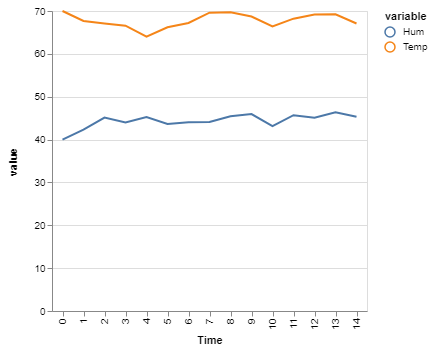

In [70]:
(alt.Chart(loc3)
 .mark_line()
 .encode(x='Time:O',
         y='value:Q',
         color='variable:N'))

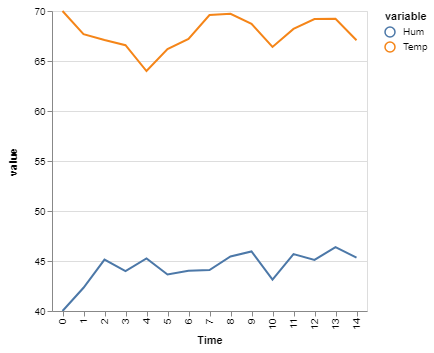

In [82]:
(alt.Chart(loc3)
 .mark_line()
 .encode(x='Time:O',
         y=alt.Y('value:Q', scale=alt.Scale(zero=False)),
         color='variable:N'))

In [73]:
meltedJustTemp = pd.melt(df, 
                         id_vars=["Time", "Loc"],
                        value_vars= ["Temp"])

In [75]:
meltedJustTemp

,Time,Loc,variable,value
0,9,8,Temp,72.083277
1,11,8,Temp,71.674503
2,2,3,Temp,67.100551
3,2,0,Temp,69.947489
4,14,0,Temp,61.075034
5,7,1,Temp,76.636459
6,9,4,Temp,69.808717
7,3,7,Temp,71.886067
8,0,2,Temp,70.000000
9,14,5,Temp,90.170598


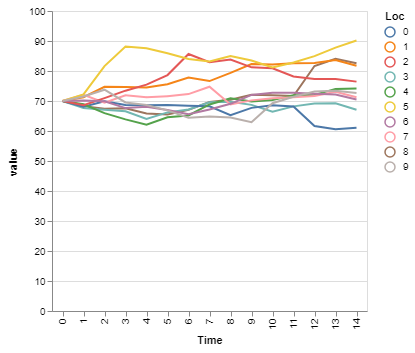

In [76]:
(alt.Chart(meltedJustTemp)
 .mark_line()
 .encode(x='Time:O',
         y='value:Q',
         color='Loc:N'))

In [ ]:
(alt.Chart(meltedJustTemp)
 .mark_line()
 .encode(x='Time:O',
         y='value:Q',
         color='Loc:N'))
    alt.Y('value:Q',
        scale=alt.Scale(zero=False)

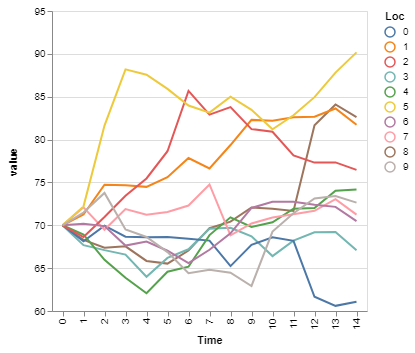

In [80]:
(alt.Chart(meltedJustTemp)
 .mark_line()
 .encode(x='Time:O',
         y=alt.Y('value:Q', scale=alt.Scale(zero=False)),
         color='Loc:N'))

In [83]:
set(melted["Loc"])

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

In [ ]:
base.transform_filter(melted.Loc == Loc)

In [87]:
from altair.expr import datum

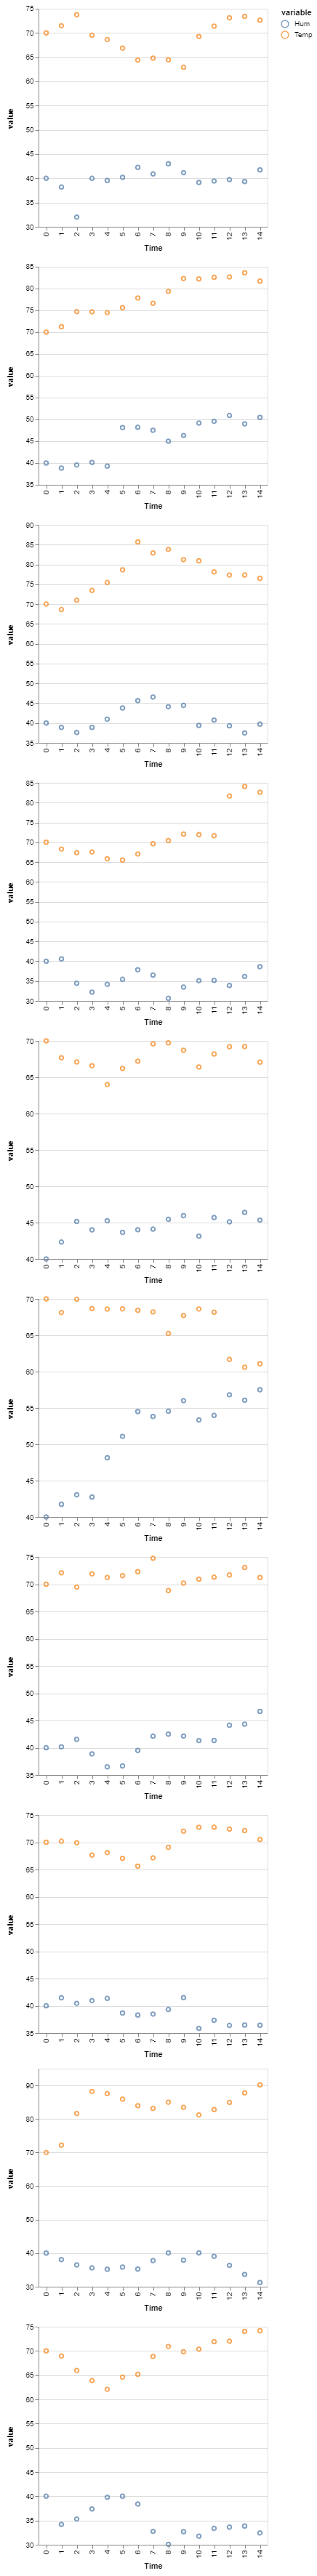

In [89]:
base = (alt.Chart(melted)
        .mark_point()
        .encode(
             x='Time:O',
             y=alt.Y('value:Q', scale=alt.Scale(zero=False)),
             color='variable:N')
       )#.properties(
        #    width=160,
        #   height=160)

chart = alt.vconcat()
for Loc in list(set(melted["Loc"])):
    chart &= base.transform_filter(datum.Loc == Loc)
chart

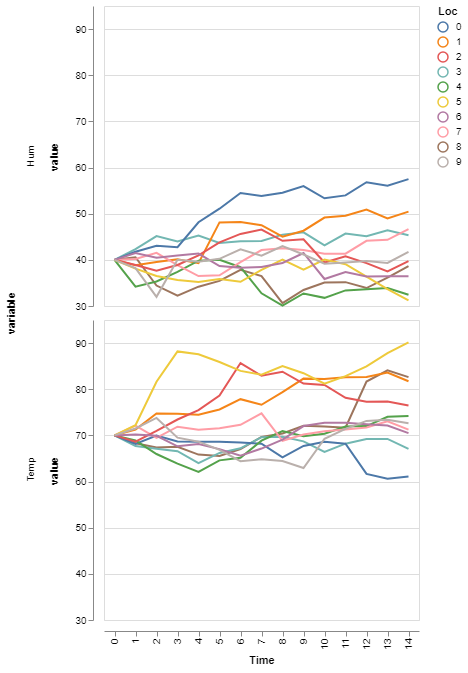

In [92]:
alt.Chart(melted).mark_line().encode(
             x='Time:O',
             y=alt.Y('value:Q', scale=alt.Scale(zero=False)),
             color='Loc:N',
             row="variable"
)

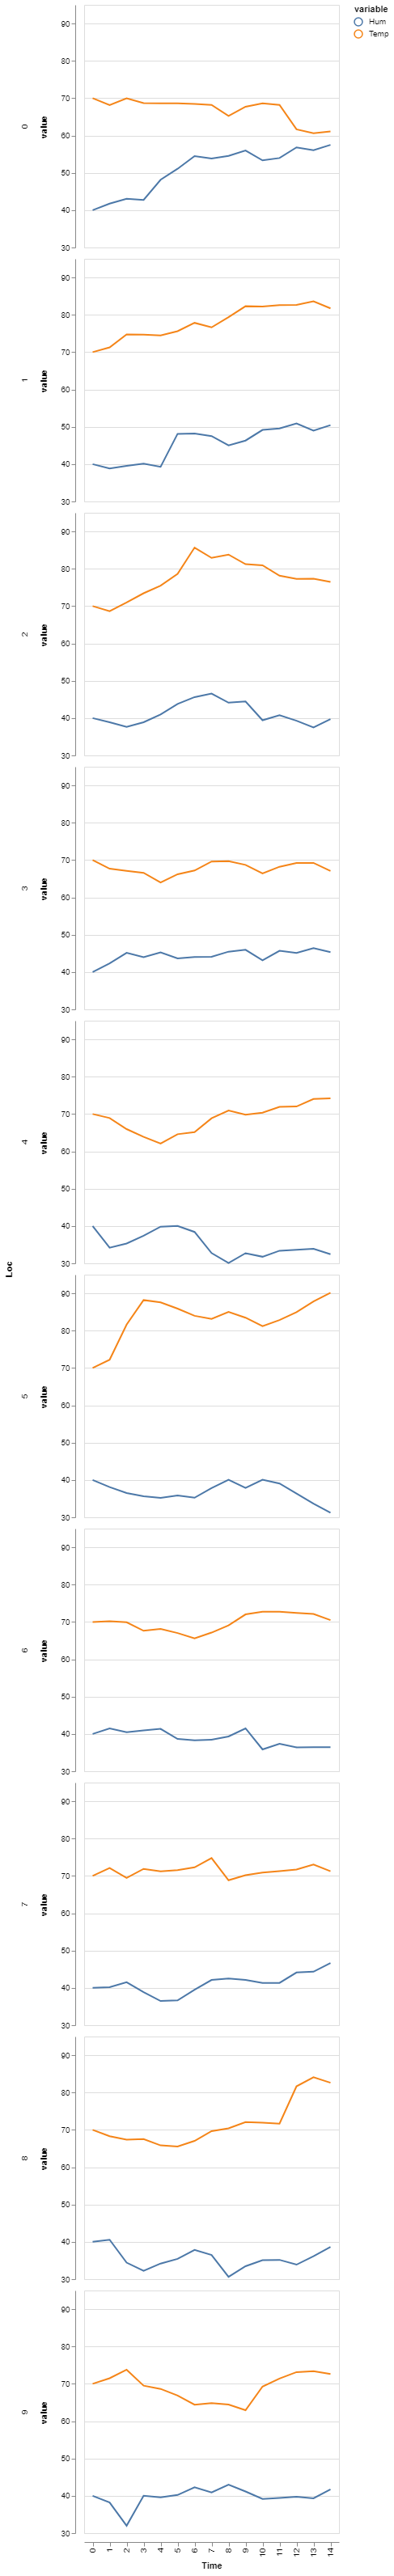

In [93]:
alt.Chart(melted).mark_line().encode(
             x='Time:O',
             y=alt.Y('value:Q', scale=alt.Scale(zero=False)),
             color='variable:N',
             row="Loc"
)